# 查看环境并准备数据

In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data19638


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

anchor_lables.py  draw_results.py    multinms.py	train.py
box_utils.py	  eval.py	     output_pic.png	yolo_epoch0.pdparams
calculate_map.py  image_utils.py     predict.py		yolo_epoch50.pdparams
darknet.py	  insects_reader.py  pred_results.json	yolov3.py
draw_anchors.py   map_utils.py	     reader.py


In [ ]:
# 将数据解压缩到 /home/aistudio/work目录下面
# 初次运行时需要将注释取消
# !unzip -d /home/aistudio/work /home/aistudio/data/data19638/insects.zip

In [1]:
# 进入工作目录  /home/aistudio/work
%cd  /home/aistudio/work

/home/aistudio/work


In [ ]:
# 查看工作目录下的文件列表
!ls

anchor_lables.py  draw_results.py    map_utils.py	reader.py
box_utils.py	  eval.py	     multinms.py	train.py
calculate_map.py  image_utils.py     output_pic.png	yolo_epoch0.pdparams
darknet.py	  insects	     predict.py		yolo_epoch50.pdparams
draw_anchors.py   insects_reader.py  pred_results.json	yolov3.py


# 启动训练

通过运行train.py 文件启动训练，训练好的模型参数会保存在/home/aistudio/work目录下。

anchor 
论文  '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326'
螺丝钉 '7, 10, 12, 22, 24, 17, 22, 45, 46, 33, 43, 88, 85, 66, 115, 146, 275, 240'

In [ ]:
anchors1 = '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 373, 326'
anchors2 = '7, 10, 12, 22, 24, 17, 22, 45, 46, 33, 43, 88, 85, 66, 115, 146, 275, 240'

In [49]:
# import os
# import shutil
# if os.path.exists('model'):
#     shutil.rmtree('model')
# os.mkdir('model')

!python python/train.py  --learning_rate 0.0001 --batch_size 16 --epoc_num 50 --anchors '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240' --use_gpu True

2020-02-18 15:58:46,891-INFO: font search path ['/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/afm', '/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
2020-02-18 15:58:47,516-INFO: generated new fontManager
-----------  Configuration Arguments -----------
anchors: 10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240
batch_size: 16
epoc_num: 50
ignore_thresh: 0.7
learning_rate: 0.0001
num_class: 7
use_gpu: 1
------------------------------------------------
W0218 15:58:48.971954    91 device_context.cc:236] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 9.2, Runtime API Version: 9.0
W0218 15:58:48.976851    91 device_context.cc:244] device: 0, cuDNN Version: 7.3.


# 启动评估

通过运行eval.py启动评估，需要制定待评估的图片文件存放路径和需要使用到的模型参数。评估结果会被保存在pred_results.json文件中

- 为了演示计算过程，下面使用的是验证集下的图片./insects/val/images，在提交比赛结果的时候，请使用测试集图片./insects/test/images

- 这里提供的yolo_epoch50是未充分训练好的权重参数，请在比赛时换成自己训练好的权重参数

In [50]:
# 在验证集val上评估训练模型，image_dir指向验证集路径，weight_file指向要使用的权重路径。
!python python/eval.py --image_dir=./insects/val/images --weight_file=./model/yolo_epoch30 --anchors '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240'

-----------  Configuration Arguments -----------
anchors: 10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240
image_dir: ./insects/val/images
weight_file: ./model/yolo_epoch30
------------------------------------------------
W0217 00:00:01.415686 12424 device_context.cc:236] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 9.2, Runtime API Version: 9.0
W0217 00:00:01.419603 12424 device_context.cc:244] device: 0, cuDNN Version: 7.3.
/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/paddle/fluid/layers/nn.py:10251: UserWarning: actual_shape will be deprecated, it is recommended to use out_shape instead of actual_shape to specify output shape dynamically.
  "actual_shape will be deprecated, it is recommended to use "
processed finished, total 245 pictures


In [52]:
# 最佳验证模型
!python python/eval.py --image_dir=./insects/val/images --weight_file=./model/yolo_epoch-best --anchors '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240'

-----------  Configuration Arguments -----------
anchors: 10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240
image_dir: ./insects/val/images
weight_file: ./model/yolo_epoch-best
------------------------------------------------
W0217 00:01:30.463670 12519 device_context.cc:236] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 9.2, Runtime API Version: 9.0
W0217 00:01:30.467083 12519 device_context.cc:244] device: 0, cuDNN Version: 7.3.
/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/paddle/fluid/layers/nn.py:10251: UserWarning: actual_shape will be deprecated, it is recommended to use out_shape instead of actual_shape to specify output shape dynamically.
  "actual_shape will be deprecated, it is recommended to use "
processed finished, total 245 pictures


In [ ]:
# 在测试集test上评估训练模型，image_dir指向测试集集路径，weight_file指向要使用的权重路径。
# 参加比赛时需要在测试集上运行这段代码，并把生成的pred_results.json提交上去
!python python/eval.py --image_dir=./insects/test/images --weight_file=./model/yolo_epoch-best --anchors '10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240'

-----------  Configuration Arguments -----------
anchors: 10, 13, 16, 30, 33, 23, 30, 61, 62, 45, 59, 119, 116, 90, 156, 198, 275, 240
image_dir: ./insects/test/images
weight_file: ./model/yolo_epoch-best
------------------------------------------------
W0217 00:04:14.298530 12623 device_context.cc:236] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 9.2, Runtime API Version: 9.0
W0217 00:04:14.302942 12623 device_context.cc:244] device: 0, cuDNN Version: 7.3.
/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/paddle/fluid/layers/nn.py:10251: UserWarning: actual_shape will be deprecated, it is recommended to use out_shape instead of actual_shape to specify output shape dynamically.
  "actual_shape will be deprecated, it is recommended to use "


## 计算精度指标

通过运行calculate_map.py计算最终精度指标MAP

- 同学们训练完之后，可以在val数据集上计算MAP查看结果，所以下面用到的是val标注数据./insects/val/annotations/xmls

- 提交比赛成绩的话需要在测试集上计算MAP，本地没有测试集的标注，只能提交json文件到比赛服务器上查看成绩


In [53]:
!python python/calculate_map.py --anno_dir=./insects/val/annotations/xmls --pred_result=./pred_results.json 

-----------  Configuration Arguments -----------
anno_dir: ./insects/val/annotations/xmls
pred_result: ./pred_results.json
------------------------------------------------
Accumulating evaluatation results...
mAP(0.50, 11point) = 94.63


In [ ]:
# 提交结果
# !rm -rf submit.sh
# !wget -O submit.sh http://ai-studio-static.bj.bcebos.com/script/submit.sh
!sh submit.sh ./pred_results.json 22574dabc3cc4951b30f386f6fabb39c

--2020-02-16 17:45:05--  http://ai-studio-static.bj.bcebos.com/script/bce-python-sdk.zip
Resolving ai-studio-static.bj.bcebos.com (ai-studio-static.bj.bcebos.com)... 182.61.200.229, 182.61.200.195
Connecting to ai-studio-static.bj.bcebos.com (ai-studio-static.bj.bcebos.com)|182.61.200.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80914 (79K) [application/zip]
Saving to: ‘bce-python-sdk.zip’

bce-python-sdk.zip  100%[===================>]  79.02K  --.-KB/s    in 0.02s   

2020-02-16 17:45:05 (4.72 MB/s) - ‘bce-python-sdk.zip’ saved [80914/80914]

Archive:  bce-python-sdk.zip
   creating: bce-python-sdk/
   creating: bce-python-sdk/baidubce/
  inflating: bce-python-sdk/baidubce/.DS_Store  
   creating: bce-python-sdk/baidubce/.idea/
  inflating: bce-python-sdk/baidubce/.idea/baidubce.iml  
   creating: bce-python-sdk/baidubce/.idea/inspectionProfiles/
   creating: bce-python-sdk/baidubce/.idea/markdown-navigator/
  inflating: bce-python-sdk/baidubce/.idea/m

# 预测单张图片并可视化预测结果

W0211 23:20:50.172408 19738 device_context.cc:236] Please NOTE: device: 0, CUDA Capability: 70, Driver API Version: 9.2, Runtime API Version: 9.0
W0211 23:20:50.176236 19738 device_context.cc:244] device: 0, cuDNN Version: 7.3.
/opt/conda/envs/python27-paddle120-env/lib/python2.7/site-packages/paddle/fluid/layers/nn.py:10251: UserWarning: actual_shape will be deprecated, it is recommended to use out_shape instead of actual_shape to specify output shape dynamically.
  "actual_shape will be deprecated, it is recommended to use "


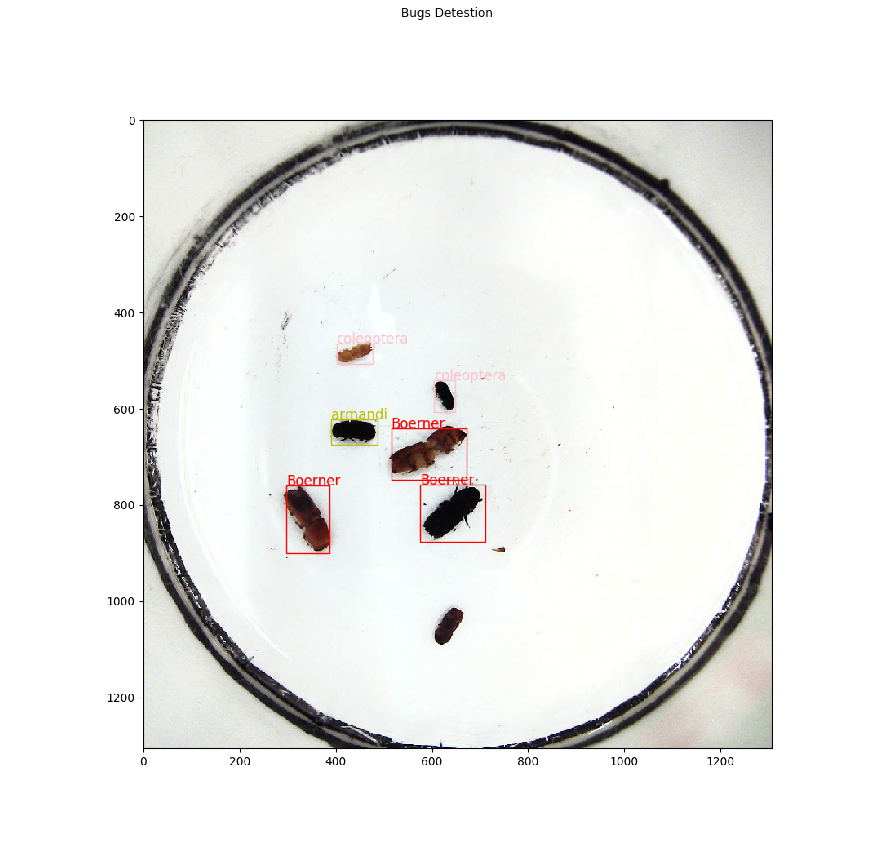

In [ ]:
!python python/predict.py --image_name=./insects/test/images/3157.jpeg --weight_file=./model/Training/yolo_epoch49
# 预测结果保存在“/home/aistudio/work/output_pic.png"图像中，运行下面的代码进行可视化
# 可视化检测结果
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./output_pic.png")

plt.figure("Object Detection", figsize=(15, 15)) # 图像窗口名称
plt.imshow(img)
plt.axis('off') # 关掉坐标轴为 off
plt.title('Bugs Detestion') # 图像题目
plt.show()

# 提升方案

这里给出的是一份基础版本的代码，可以在上面继续改进提升，可以使用的改进方案有：

- 1、使用其它模型如faster rcnn等 （难度系数5）

- 2、使用数据增多，可以对原图进行翻转、裁剪等操作 （难度系数3）

- 3、修改anchor参数的设置，教案中的anchor参数设置直接使用原作者在coco数据集上的设置，针对此模型是否要调整 （难度系数3）

- 4、调整优化器、学习率策略、正则化系数等是否能提升模型精度 （难度系数1）

